In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [6]:
pip install fuzzy-c-means

In [7]:
from fcmeans import FCM

In [8]:
dataset = pd.read_csv("/content/ionosphere.data", delimiter=',', header=None) 
target = dataset[34]
data = dataset.drop(34, axis=1)

# **Визуализация исходных данных**

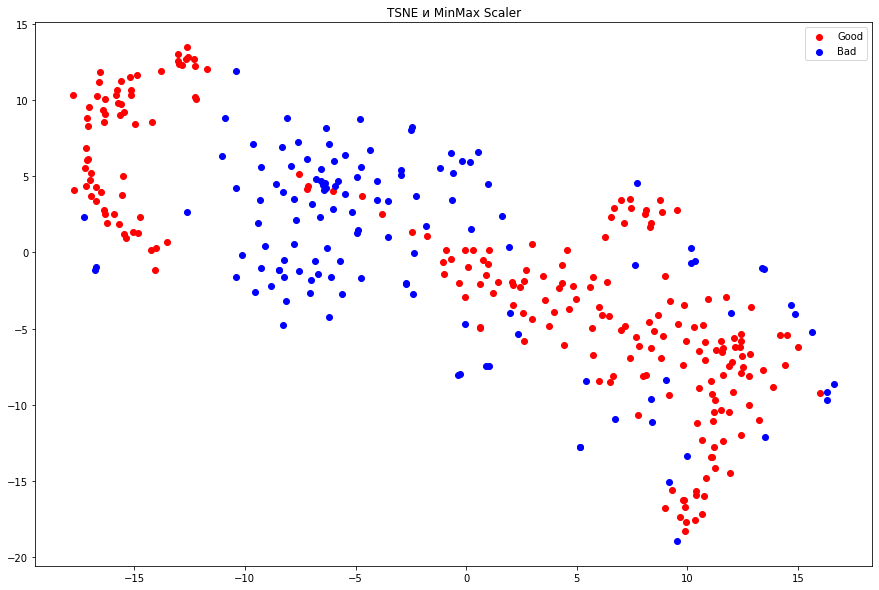

In [9]:

colors = 'r', 'b', 'g' , 'c', 'm', 'y',"black","violet", "purple","silver"
target_names = ["Good", "Bad"]
target_ids = ['g', 'b']
dataclasses = np.asarray(target)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

tsne_result = TSNE(n_components=2, learning_rate='auto', init='random' , random_state=0).fit_transform(scaled_data)
plt.figure(figsize=(15,10))
plt.title("TSNE и MinMax Scaler")
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(tsne_result[dataclasses==i,0], tsne_result[dataclasses == i, 1], c=c, label=label)
plt.legend()
plt.show()

# **Кластеризация при помощи K-MEANS**

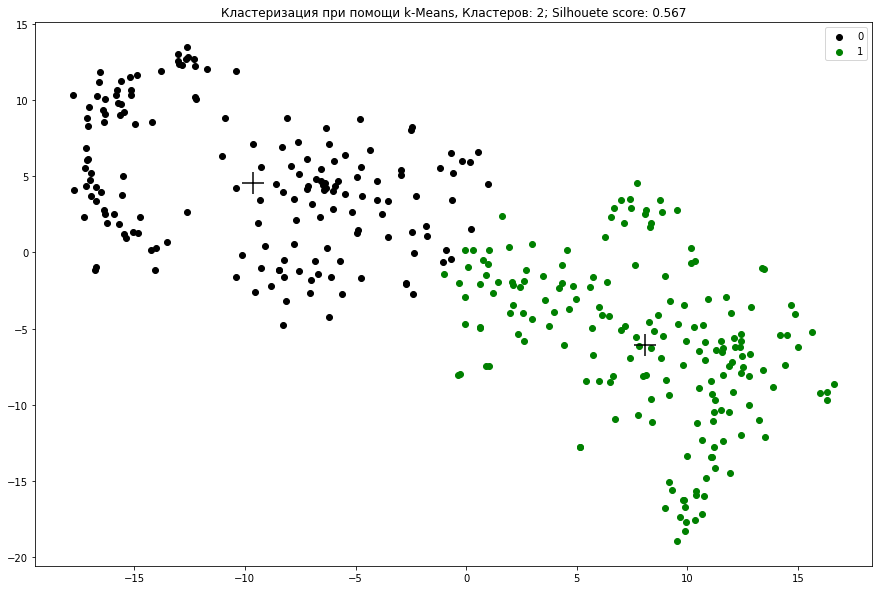

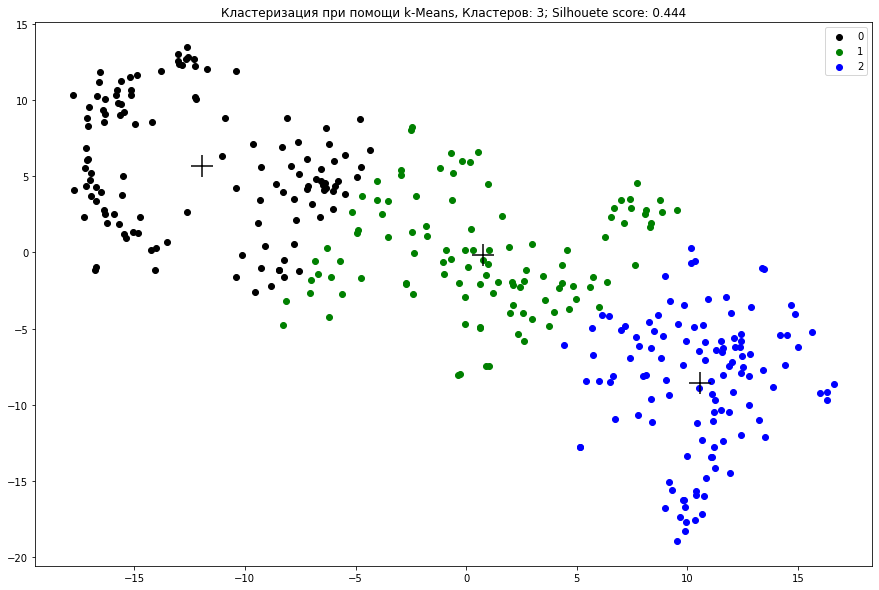

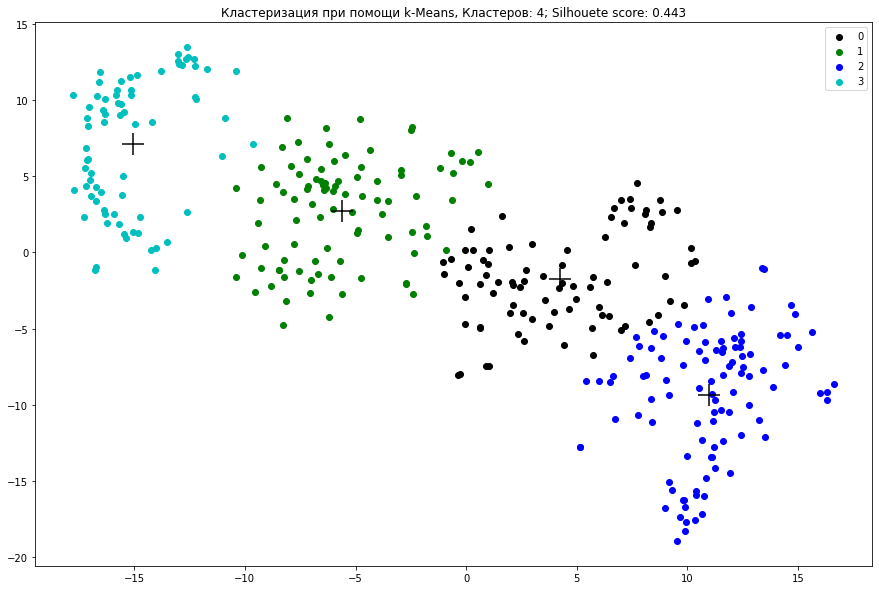

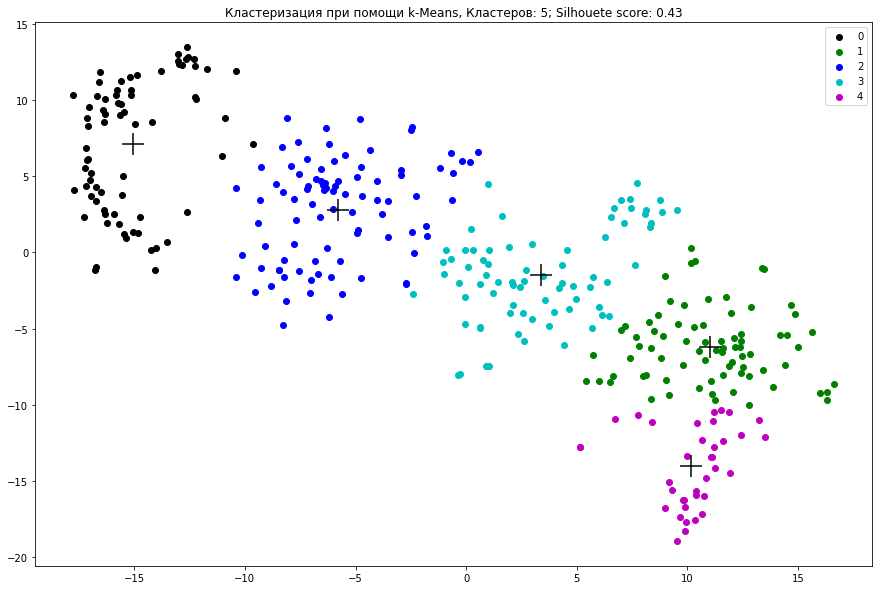

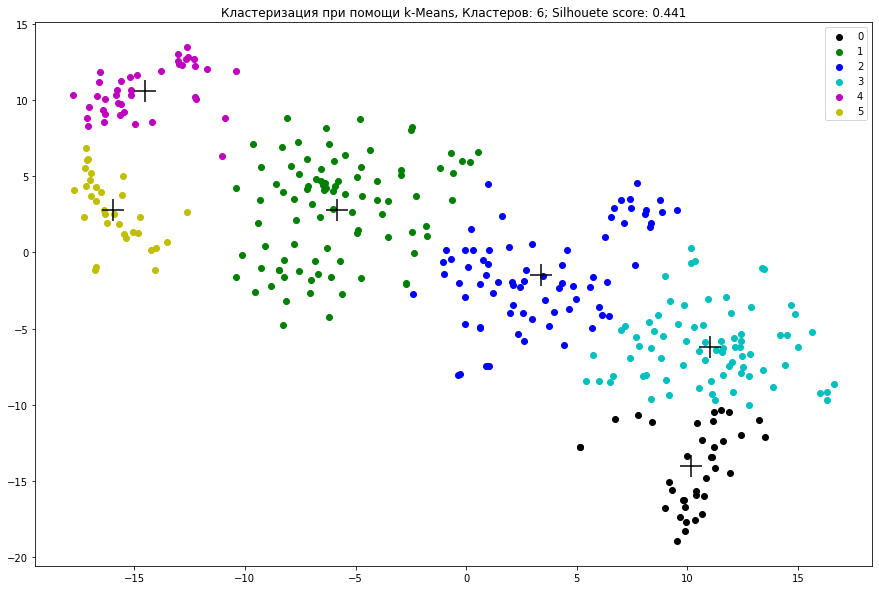

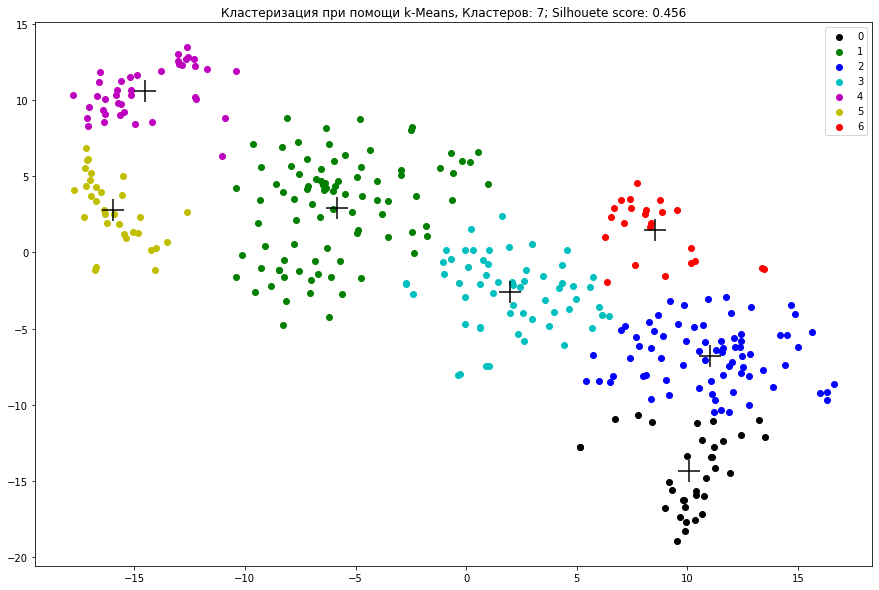

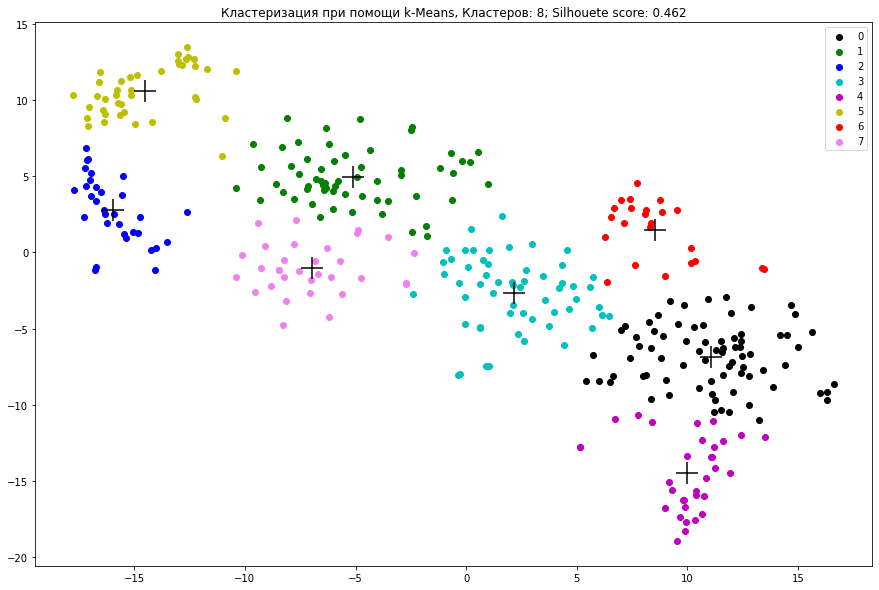

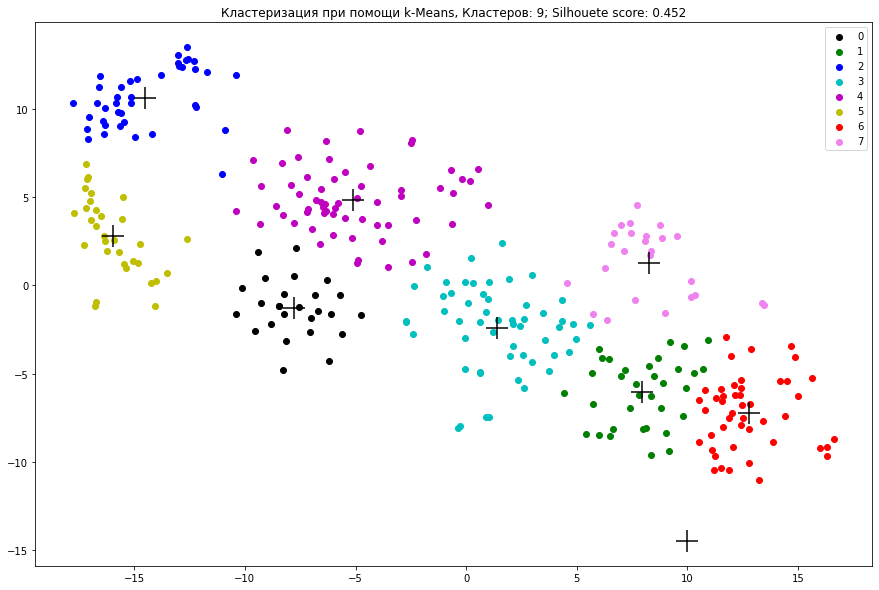

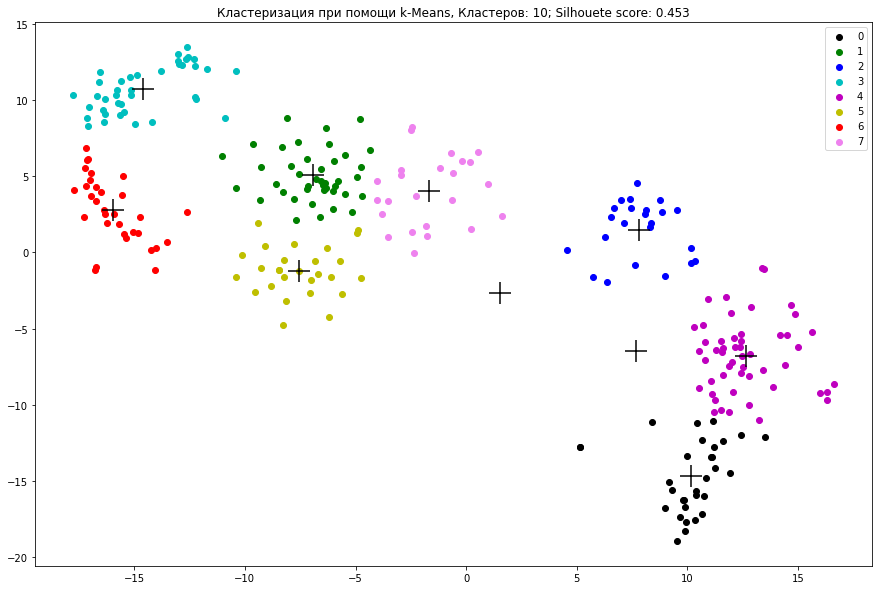

In [13]:
for i in range(1,10):
  # кластеризация данных
  kMeans = KMeans(n_clusters=i+1, random_state=0, algorithm="elkan").fit(tsne_result)
  clusterCentersKMeans = kMeans.cluster_centers_
  kMeansPredictResult =kMeans.predict(tsne_result)
  # подсчет индекса кластерного силуэта
  silhouette_scoreKmeans = metrics.silhouette_score(tsne_result,kMeansPredictResult)
  # визуализация
  plt.figure(figsize=(15,10))
  plt.title("Кластеризация при помощи k-Means, Кластеров: " + str(i+1) + "; Silhouete score: " + str(round(silhouette_scoreKmeans, 3)))
  for i, c in zip(range(i+1), colors):
    plt.scatter(tsne_result[kMeansPredictResult==i,0], tsne_result[kMeansPredictResult == i, 1], c=c, label=i)
  plt.scatter(clusterCentersKMeans[:,0],clusterCentersKMeans[:,1], marker="+", s=500, c="black")
  plt.legend()
  plt.show()

# **Кластеризация Fuzzy C-means**

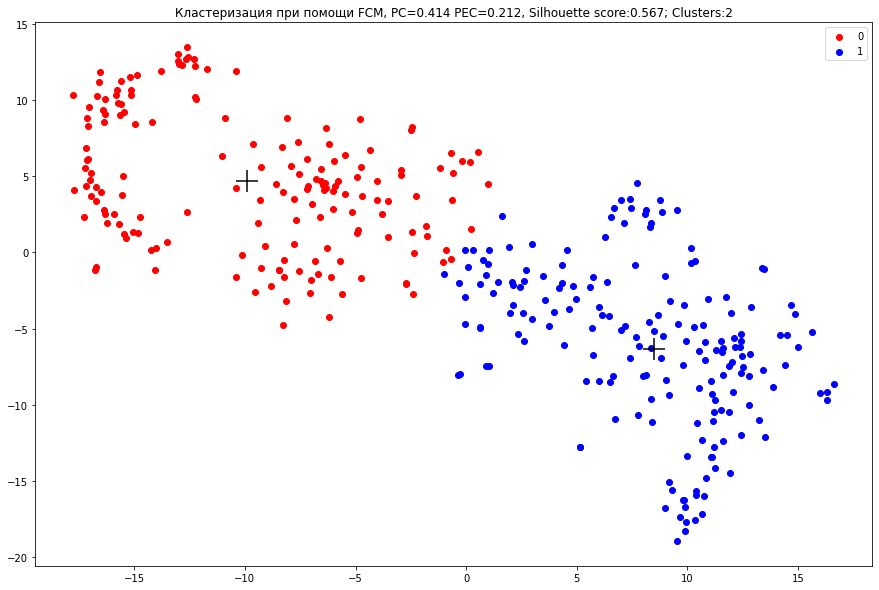

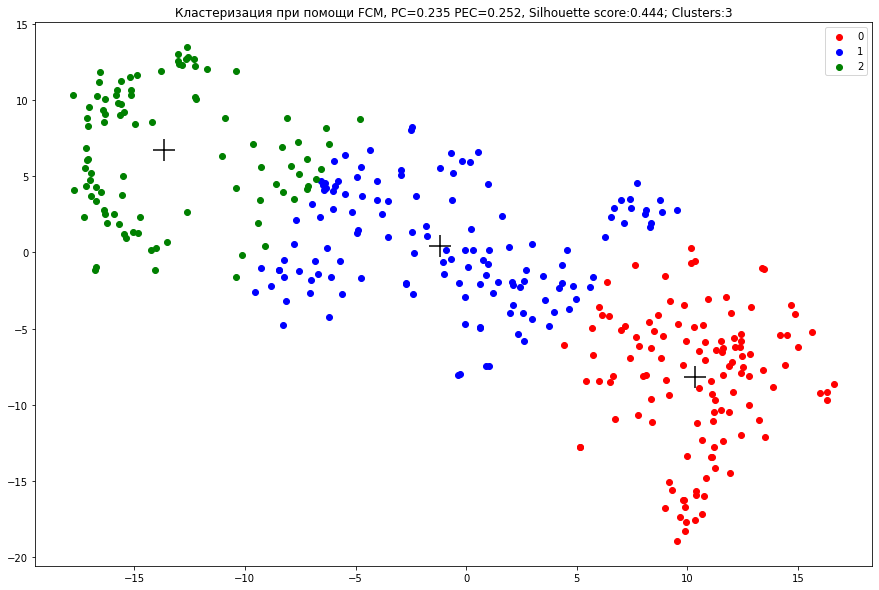

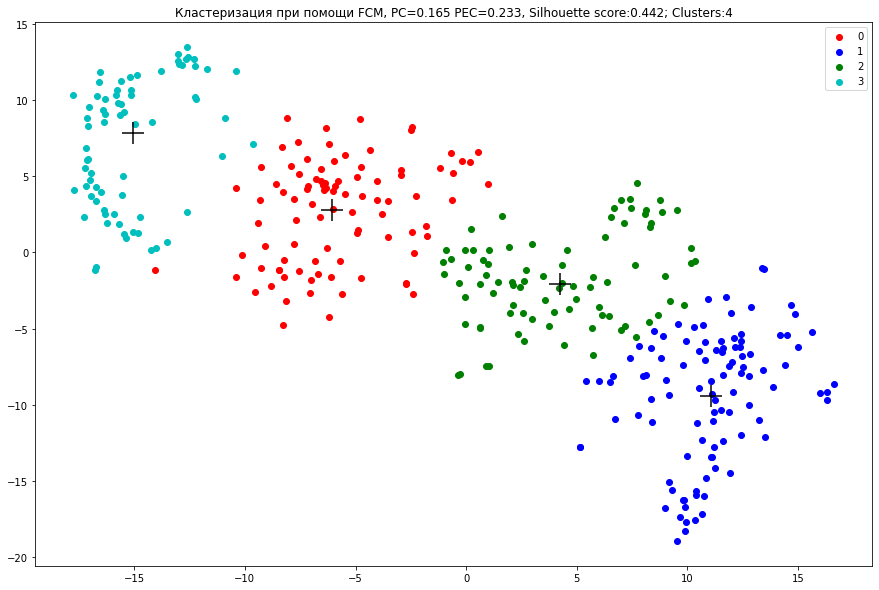

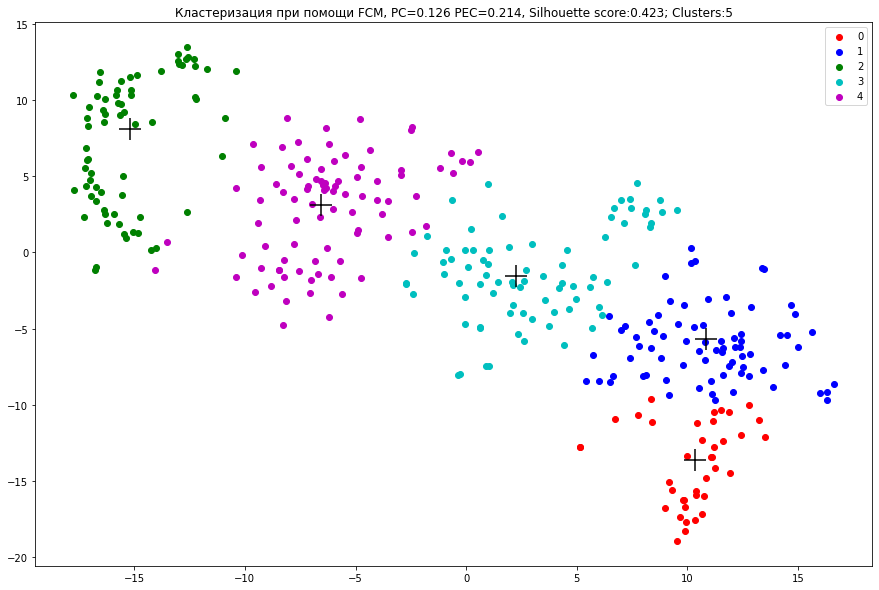

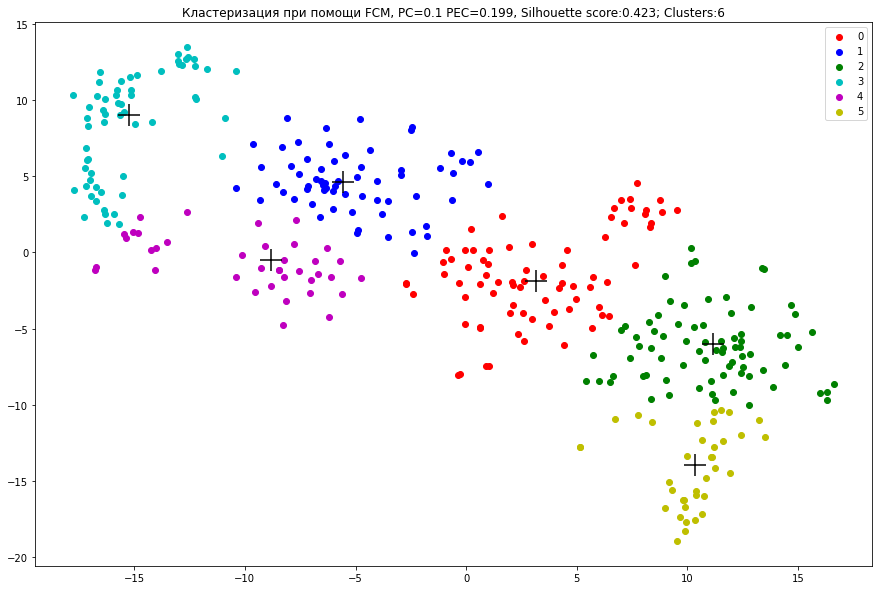

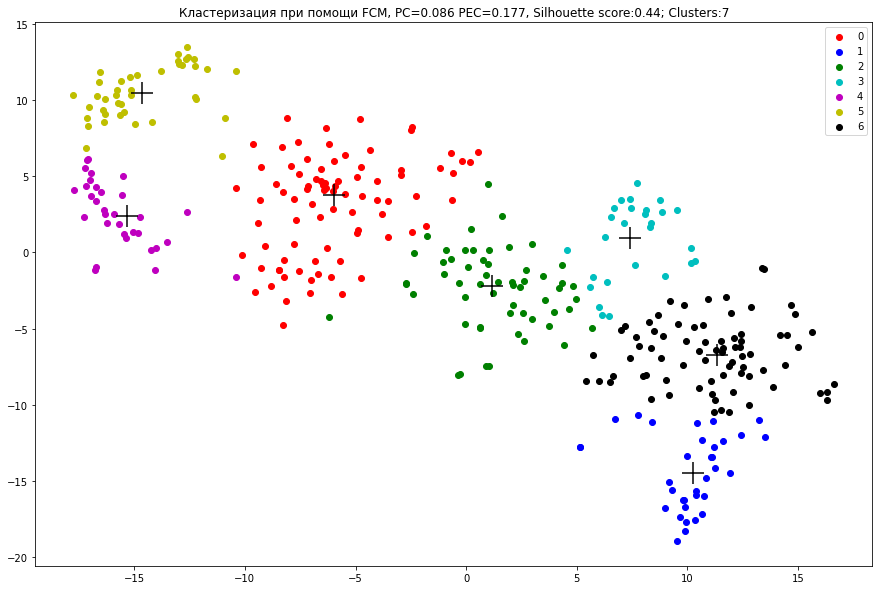

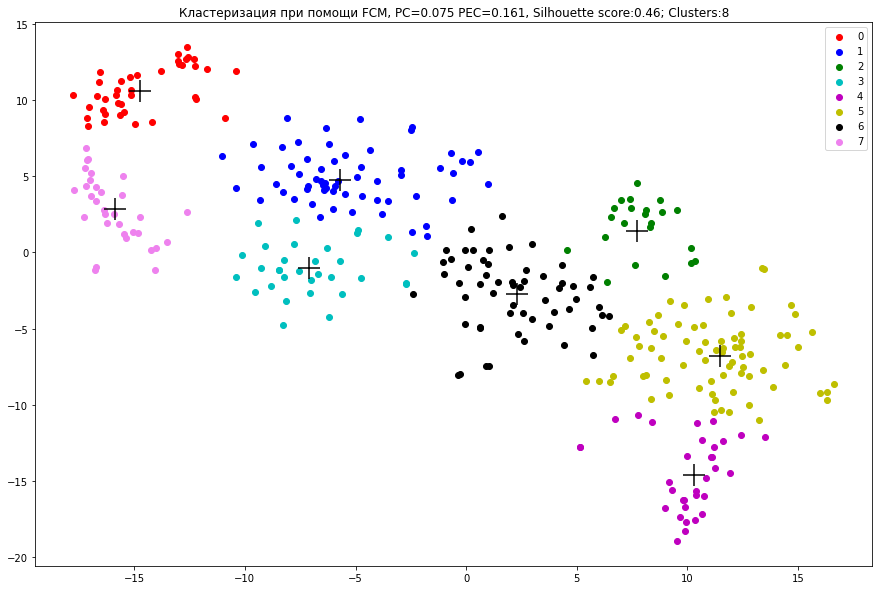

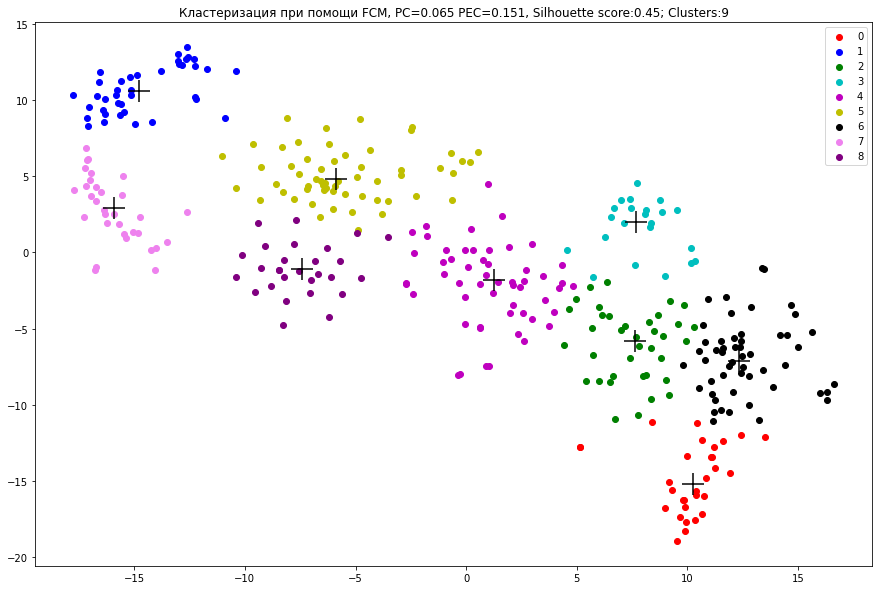

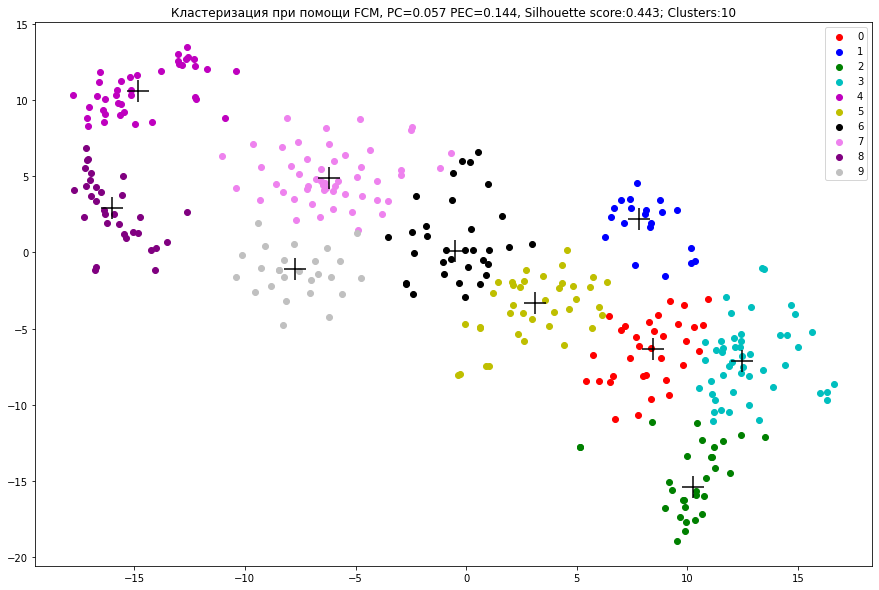

In [11]:
for i in range(1,10):
  # Кластеризация при помощи FCM алгоритма
  fcm = FCM(n_clusters=i+1, random_state=0)
  fcm.fit(tsne_result)
  fcmResult = fcm.predict(tsne_result)
  fcmCenters = fcm.centers
  pc= fcm.partition_coefficient
  pec = fcm.partition_entropy_coefficient

  # Индек кластерного силуэта
  silhouette_scoreFCM = metrics.silhouette_score(tsne_result,fcmResult)
  
  # Визуализация
  plt.figure(figsize=(15,10))
  plt.title("Кластеризация при помощи FCM, PC=" + str(round(pc,ndigits=3))+ " PEC=" + str(round(pec,ndigits=3))+ \
            ", Silhouette score:" + str(round(silhouette_scoreFCM,3)) \
            + "; Clusters:" + str(i+1))
  for i, c in zip(range(i+1), colors):
      plt.scatter(tsne_result[fcmResult==i,0], tsne_result[fcmResult == i, 1], c=c, label=i)
  plt.scatter(fcmCenters[:,0],fcmCenters[:,1], c="black", marker="+", s=500)
  plt.legend()
  plt.show()

# **Кластеризация при помощи DBSCAN**

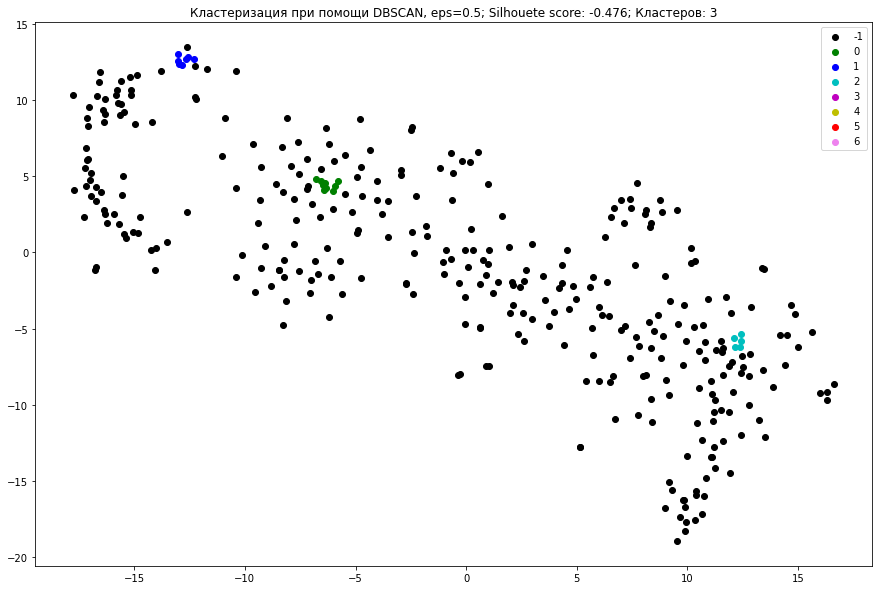

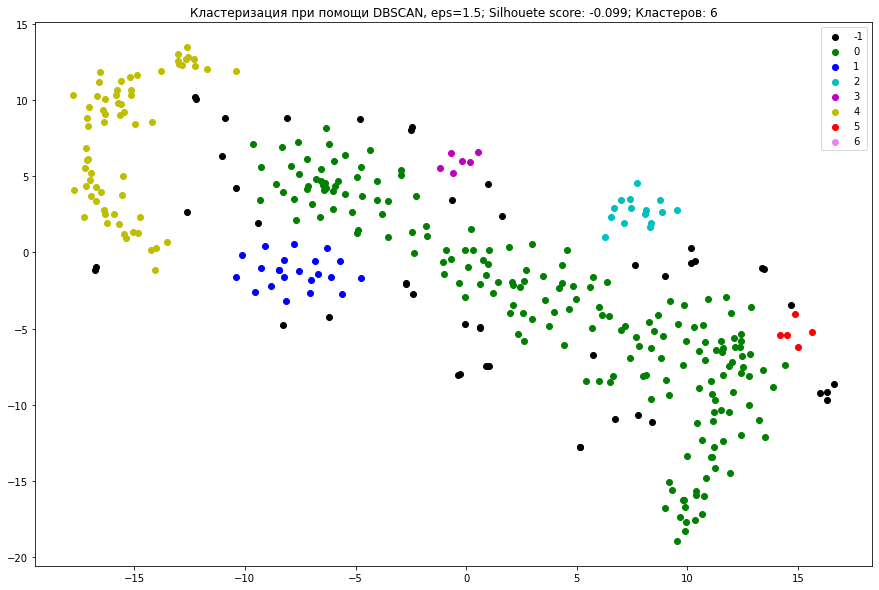

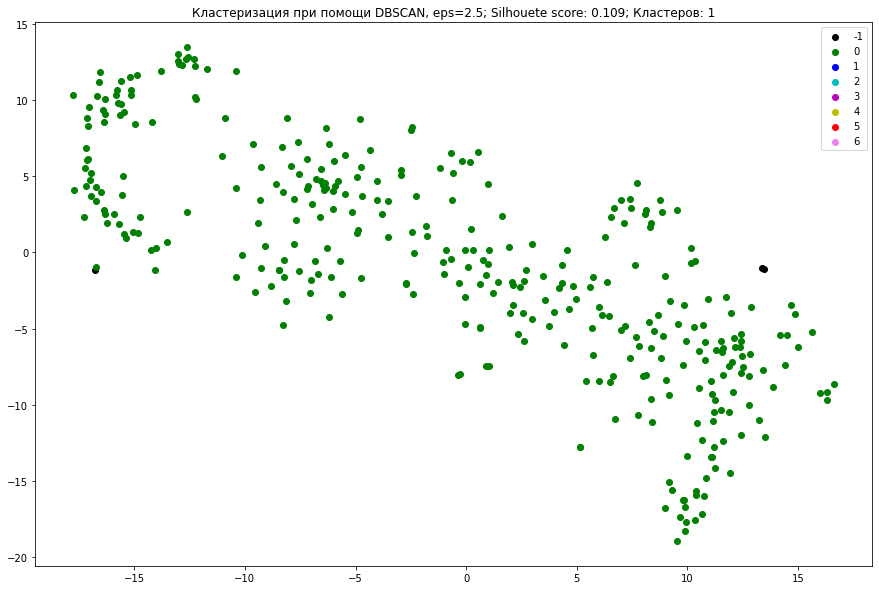

In [12]:
# создаем массив параметров, которые затем будут применены для проверки алгоритма кластеризации
eps = np.arange(start=0.5, stop=3,step=1)
for param in eps:
  # DBSCAN кластеризация
  dbScan = DBSCAN(eps=param, min_samples=5)
  dbScanResult = dbScan.fit_predict(tsne_result)
  
  # если уникальных кластеров больше одного (есть данные кроме шумовых), то счиатем silhouette score
  if len(np.unique(dbScanResult)) > 1:
    silhouette_scoreDBSCAN = metrics.silhouette_score(tsne_result,dbScanResult)

  # шумы не считаем за кластеры
  n_clusters = 0
  if -1 in dbScanResult:
    # если есть шумы в массиве данных, то число кластеров равно размеру уникальных элементов массива минус 1
    n_clusters = len(np.unique(dbScanResult)) - 1
  else:
    n_clusters = len(np.unique(dbScanResult))
  
  # Визуализация
  plt.figure(figsize=(15,10))
  plt.title("Кластеризация при помощи DBSCAN, eps=" + str(param) + "; Silhouete score: " + str(round(silhouette_scoreDBSCAN, 3)) + "; Кластеров: " + str(n_clusters))
  target_ids=[-1,0,1,2,3,4,5,6,7,8, 9, 10,11,12]
  colors = 'black', 'g', 'b', 'c', 'm', 'y',"r","violet"
  for i, c in zip(target_ids, colors):
      plt.scatter(tsne_result[dbScanResult==i,0], tsne_result[dbScanResult == i, 1],c=c, label=i)
  plt.legend()
  plt.show()